In [27]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as soc 
from scipy import constants as const
from lmfit import models
from lmfit import Model
from scipy.signal import find_peaks

In [28]:
#import Oszilloskop daten 
puls1 = np.array(np.genfromtxt("tab/oszilloskop/puls1.csv", delimiter = ",",skip_header=12))
puls2 = np.array(np.genfromtxt("tab/oszilloskop/puls2.csv", delimiter = ",",skip_header=12))
sg1c1 =  np.array(np.genfromtxt("tab/oszilloskop/signalc1.csv", delimiter = ",",skip_header=12))
sg1c3 =  np.array(np.genfromtxt("tab/oszilloskop/s2c3.csv", delimiter = ",",skip_header=12))
sg2c1 =  np.array(np.genfromtxt("tab/oszilloskop/sg3c1.csv", delimiter = ",",skip_header=12))
sg2c3 =  np.array(np.genfromtxt("tab/oszilloskop/sg4c3.csv", delimiter = ",",skip_header=12))

In [29]:
#import first tabel
tlam= np.array(np.genfromtxt("tab/messreihe1.txt", delimiter='&'))
absorption = np.array(np.genfromtxt("tab/absorption.txt", delimiter='&'))
lpow1 = np.array(np.genfromtxt("tab/lpow1.txt", delimiter='&'))*10
lpow2 = np.array(np.genfromtxt("tab/lpow2.txt", delimiter='&'))*10
secondp1 = np.array(np.genfromtxt("tab/2ndwave-power.txt", delimiter='&'))
ndpower = np.array(np.genfromtxt("tab/ndyagpower.txt", delimiter='&'))

In [30]:
def linear(x:np.array,m:float,b:float):
    return m*x+b

0.9998407299101856 {'m': 0.31431439325383087, 'b': 797.9283071779096}


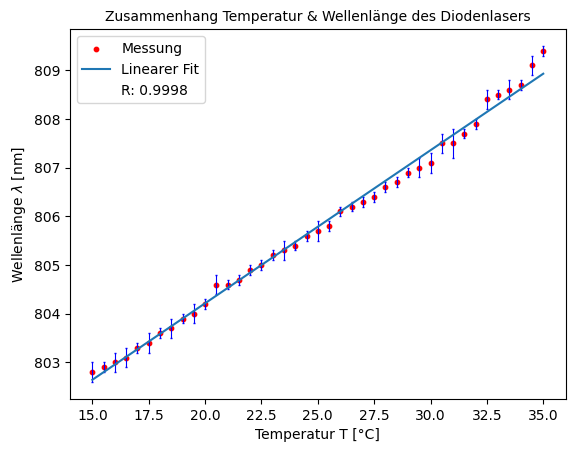

In [31]:
plt.scatter(tlam[:,0],tlam[:,1],s=10,c="red",label="Messung")
plt.errorbar(tlam[:,0],tlam[:,1],yerr=tlam[:,2],linestyle="",capsize=1,c="blue",elinewidth=0.8)

lmodel = Model(linear)
lparam = lmodel.make_params(m = 0.3,b = 800)
lresult = lmodel.fit(tlam[:,1],params=lparam,x = tlam[:,0],weights = tlam[:,2])
plt.plot(tlam[:,0], lresult.best_fit, '-', label='Linearer Fit')
plt.plot([], [], ' ', label="R: "+str(np.round(lresult.rsquared,4)))
print(lresult.rsquared,lresult.best_values)

plt.legend(loc=0)
plt.ylabel(r"Wellenlänge $\lambda$ [nm]")
plt.xlabel(r"Temperatur T [°C]")
plt.title("Zusammenhang Temperatur & Wellenlänge des Diodenlasers",fontsize=10)
plt.savefig("Plots/Temperatur_Wellenlänge_Diode.pdf")

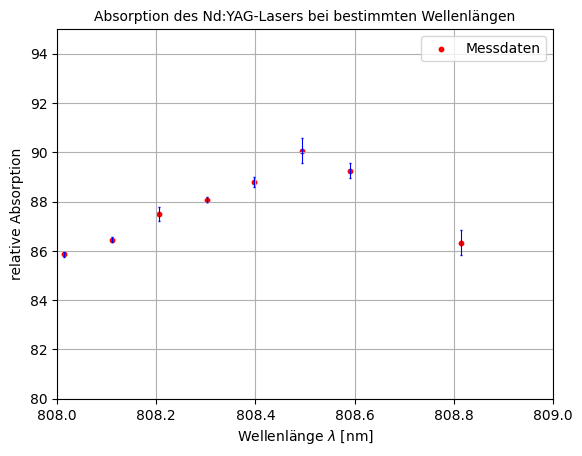

In [32]:
plt.errorbar((0.32*absorption[:,0]+797.87),100-(absorption[:,2]/85.6)*100,yerr=absorption[:,3],linestyle="",capsize=1,c="blue",elinewidth=0.8)
plt.scatter((0.32*absorption[:,0]+797.87),100-(absorption[:,2]/85.6)*100,s=10,c="red",label="Messdaten")
#maxabsorbance = 0.32*(np.max(100-(absorption[:,2]/85.6)*100))+797.87
#plt.plot(tlam[:,0],popt[0]*tlam[:,0]+popt[1],color="orange",label="Linearer Fit: "+str(round(popt[0],2))+"* T + "+str(round(popt[1],5)))
plt.grid(True)
plt.axis([808,809,80,95])
plt.legend(loc=0)
plt.xlabel(r"Wellenlänge $\lambda$ [nm]")
plt.ylabel(r"relative Absorption")
plt.title("Absorption des Nd:YAG-Lasers bei bestimmten Wellenlängen",fontsize=10)
#plt.savefig("Plots/absorptionndyag.pdf")
plt.savefig("Plots/absorptionndyaglimited.pdf")

0.885605628383015 {'m': 0.03871691726014746, 'b': -93.98514024429039}
0.9851916242671576 {'m': 0.10913728426746756, 'b': -251.48249892974604}


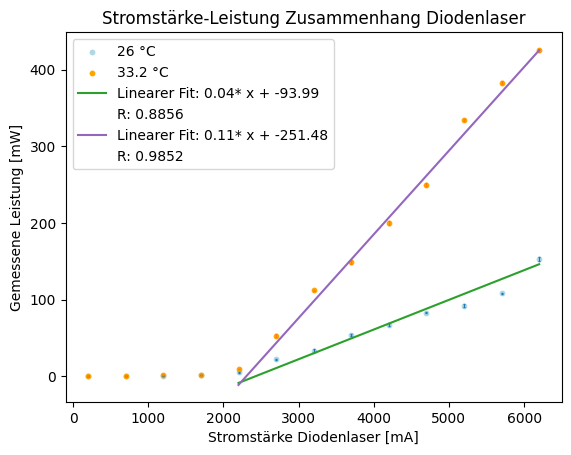

In [33]:
plt.errorbar(lpow1[:,0],lpow1[:,1],yerr=lpow1[:,2],linestyle="",capsize=1,elinewidth=0.8)
plt.scatter(lpow1[:,0],lpow1[:,1],s=10,label="26 °C",c="lightblue")

#popt1,cov1 = soc.curve_fit(linear,lpow1[0:9,0],lpow1[0:9,1],sigma=lpow1[0:9,2])
#plt.plot(lpow1[0:9,0],popt1[0]*lpow1[0:9,0]+popt1[1],c="lightblue")

plt.errorbar(lpow2[:,0],lpow2[:,1],yerr=lpow2[:,2],linestyle="",capsize=1,elinewidth=0.8)
plt.scatter(lpow2[:,0],lpow2[:,1],s=10,label="33.2 °C",c="orange")

#popt2,cov2 = soc.curve_fit(linear,lpow2[4:13,0],lpow2[4:13,1],sigma=lpow2[4:13,2])
#plt.plot(lpow2[4:13,0],popt2[0]*lpow2[4:13,0]+popt2[1],c="orange")


lmodel = Model(linear)
lparam = lmodel.make_params(m = 1,b = 1)
lresult1 = lmodel.fit(lpow1[0:9,1],params=lparam,x = lpow1[0:9,0],weights = lpow1[0:9,2])
lresult2 = lmodel.fit(lpow2[4:13,1],params=lparam,x = lpow2[4:13,0],weights = lpow2[4:13,2])

plt.plot(lpow1[0:9,0], lresult1.best_fit, '-', label='Linearer Fit: '+str(np.round(lresult1.best_values["m"],2))+"* x + "+str(np.round(lresult1.best_values["b"],2)))
plt.plot([], [], ' ', label="R: "+str(np.round(lresult1.rsquared,4)))
print(lresult1.rsquared,lresult1.best_values)

plt.plot(lpow2[4:13,0], lresult2.best_fit, '-', label='Linearer Fit: '+str(np.round(lresult2.best_values["m"],2))+"* x + "+str(np.round(lresult2.best_values["b"],2)))
plt.plot([], [], ' ', label="R: "+str(np.round(lresult2.rsquared,4)))
print(lresult2.rsquared,lresult2.best_values)


plt.xlabel("Stromstärke Diodenlaser [mA]")
plt.ylabel("Gemessene Leistung [mW]")
plt.title("Stromstärke-Leistung Zusammenhang Diodenlaser")
plt.legend()
plt.savefig("Plots/powerup.pdf")

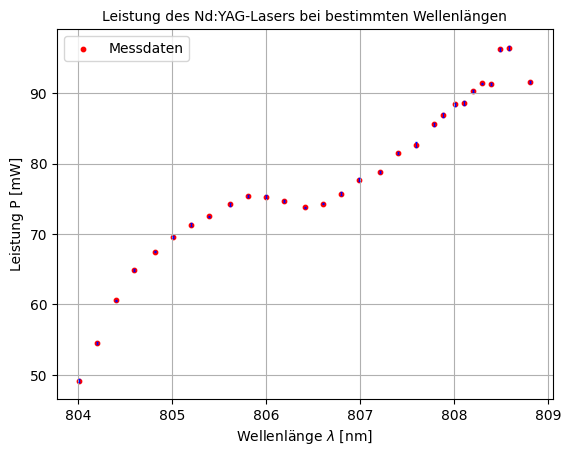

In [34]:
plt.errorbar((0.32*secondp1[:,0]+797.87),secondp1[:,2],yerr=secondp1[:,3],linestyle="",capsize=1,c="blue",elinewidth=0.8)
plt.scatter((0.32*secondp1[:,0]+797.87),secondp1[:,2],s=10,c="red",label="Messdaten")
#maxabsorbance = 0.32*(np.max(100-(absorption[:,2]/85.6)*100))+797.87
#plt.plot(tlam[:,0],popt[0]*tlam[:,0]+popt[1],color="orange",label="Linearer Fit: "+str(round(popt[0],2))+"* T + "+str(round(popt[1],5)))
plt.grid(True)
#plt.axis([808,809,82,98])
plt.legend(loc=0)
plt.xlabel(r"Wellenlänge $\lambda$ [nm]")
plt.ylabel(r"Leistung P [mW]")
plt.title("Leistung des Nd:YAG-Lasers bei bestimmten Wellenlängen",fontsize=10)
#plt.savefig("Plots/absorptionndyag.pdf")
plt.savefig("Plots/wave_power.pdf")

0.9999157588264632 {'m': 0.2855752979413773, 'b': -76.96219212706221}
0.2855752979413773


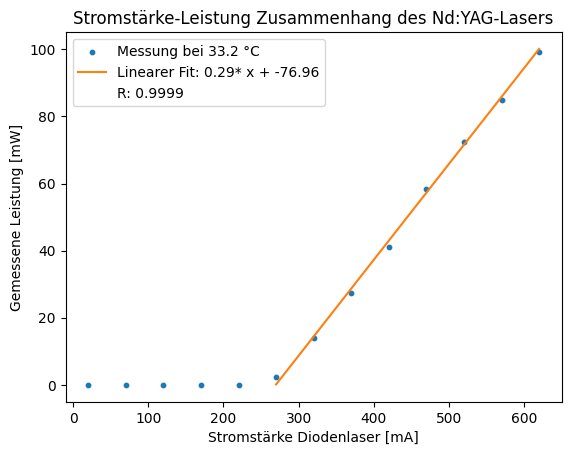

In [35]:
plt.errorbar(ndpower[:,0],ndpower[:,1],yerr=ndpower[:,2],linestyle="",capsize=1,elinewidth=0.8)
plt.scatter(ndpower[:,0],ndpower[:,1],s=10,label="Messung bei 33.2 °C")

lmodel = Model(linear)
lparam = lmodel.make_params(m = 1,b = 1)
lresult = lmodel.fit(ndpower[5:13,1],params=lparam,x = ndpower[5:13,0],weights = ndpower[5:13,2])

plt.plot(ndpower[5:13,0], lresult.best_fit, '-', label='Linearer Fit: '+str(np.round(lresult.best_values["m"],2))+"* x + "+str(np.round(lresult.best_values["b"],2)))
plt.plot([], [], ' ', label="R: "+str(np.round(lresult.rsquared,4)))
print(lresult.rsquared,lresult.best_values)
print(lresult.best_values["m"])

#popt3,cov3 = soc.curve_fit(linear,ndpower[5:13,0],ndpower[5:13,1],sigma=ndpower[5:13,2])
#plt.plot(ndpower[5:13,0],linear(ndpower[5:13,0],*popt3))
plt.xlabel("Stromstärke Diodenlaser [mA]")
plt.ylabel("Gemessene Leistung [mW]")
plt.title("Stromstärke-Leistung Zusammenhang des Nd:YAG-Lasers")
plt.legend()
plt.savefig("Plots/powerupndy.pdf")

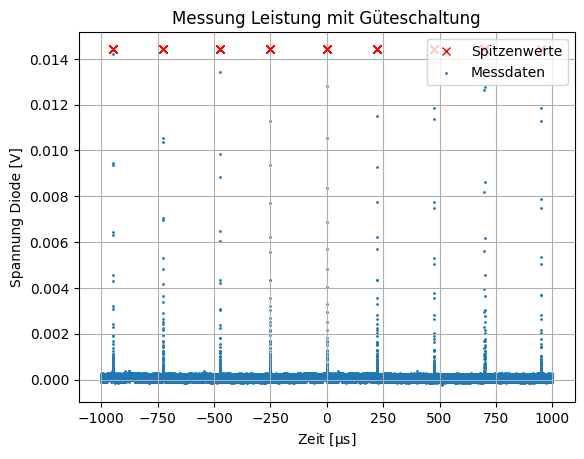

In [36]:
#plt.figure(figsize=(10,6))
peaks, _ = find_peaks(puls1[::,1],height=0.012,plateau_size=2)
plt.plot(puls1[peaks,0]*10**6, puls1[peaks,1], "x",c="red",label="Spitzenwerte")


plt.scatter(puls1[::10,0]*10**6,puls1[::10,1],label="Messdaten",s=1)
#plt.axis([-1,2,0,0.015])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$")
plt.ylabel("Spannung Diode [V]")
plt.title("Messung Leistung mit Güteschaltung")
plt.legend(loc=1)
plt.grid(True)
#plt.savefig("Plots/osci1_peak.pdf")
plt.show()

In [37]:
print(puls1[peaks,0]*10**6)

[-9.49954e+02 -9.49942e+02 -9.49930e+02 -9.49914e+02 -9.49906e+02
 -9.49898e+02 -9.49890e+02 -9.49874e+02 -9.49866e+02 -9.49858e+02
 -9.49848e+02 -9.49834e+02 -9.49826e+02 -7.26086e+02 -7.26074e+02
 -7.26050e+02 -7.26034e+02 -7.26010e+02 -7.25996e+02 -7.25970e+02
 -7.25956e+02 -7.25934e+02 -7.25926e+02 -7.25916e+02 -4.74612e+02
 -4.74590e+02 -4.74582e+02 -4.74570e+02 -4.74550e+02 -4.74532e+02
 -4.74510e+02 -4.74494e+02 -4.74482e+02 -2.51098e+02 -2.51090e+02
 -2.51074e+02 -2.51062e+02 -2.51050e+02 -2.51034e+02 -2.51026e+02
 -2.51018e+02 -2.51010e+02 -2.50994e+02 -2.50986e+02 -2.50978e+02
 -2.50968e+02 -2.50954e+02 -2.50946e+02 -2.50938e+02 -2.50928e+02
 -2.50920e+02 -2.50914e+02  8.60000e-02  1.10000e-01  1.22000e-01
  1.36000e-01  1.50000e-01  1.62000e-01  1.74000e-01  1.90000e-01
  2.02000e-01  2.14000e-01  2.23246e+02  2.23254e+02  2.23262e+02
  2.23272e+02  2.23286e+02  2.23294e+02  2.23302e+02  2.23312e+02
  2.23320e+02  2.23326e+02  2.23334e+02  2.23352e+02  2.23360e+02
  2.23366e

In [38]:
p1 = [-9.49954e+02, -9.49942e+02, -9.49930e+02, -9.49914e+02, -9.49906e+02,-9.49898e+02, -9.49890e+02, -9.49874e+02, -9.49866e+02, -9.49858e+02, -9.49848e+02, -9.49834e+02, -9.49826e+02]
p2 = [-7.26086e+02, -7.26074e+02,-7.26050e+02, -7.26034e+02, -7.26010e+02, -7.25996e+02, -7.25970e+02, -7.25956e+02, -7.25934e+02, -7.25926e+02, -7.25916e+02]
p3 = [-4.74612e+02, -4.74590e+02, -4.74582e+02, -4.74570e+02, -4.74550e+02, -4.74532e+02, -4.74510e+02, -4.74494e+02, -4.74482e+02]
p4 = [-2.51098e+02, -2.51090e+02, -2.51074e+02, -2.51062e+02, -2.51050e+02, -2.51034e+02, -2.51026e+02, -2.51018e+02, -2.51010e+02, -2.50994e+02, -2.50986e+02, -2.50978e+02, -2.50968e+02, -2.50954e+02, -2.50946e+02, -2.50938e+02, -2.50928e+02, -2.50920e+02, -2.50914e+02]
p5 = [8.60000e-02,  1.10000e-01,  1.22000e-01,  1.36000e-01,  1.50000e-01 , 1.62000e-01 , 1.74000e-01 , 1.90000e-01,  2.02000e-01,  2.14000e-01]
p6 = [2.23246e+02 , 2.23254e+02 , 2.23262e+02,  2.23272e+02,  2.23286e+02 , 2.23294e+02 , 2.23302e+02 , 2.23312e+02,  2.23320e+02 , 2.23326e+02 , 2.23334e+02,  2.23352e+02 , 2.23360e+02,  2.23366e+02 , 2.23374e+02,  2.23392e+02 , 2.23414e+02]
p7 = [4.75130e+02,  4.75150e+02 , 4.75158e+02 , 4.75166e+02 , 4.75190e+02 , 4.75202e+02,  4.75230e+02 , 4.75240e+02,  4.75250e+02]
p8 = [6.99446e+02,  6.99458e+02,  6.99466e+02 , 6.99478e+02,  6.99498e+02,  6.99510e+02,  6.99538e+02,  6.99548e+02 , 6.99558e+02 , 6.99588e+02  ,6.99598e+02 , 6.99628e+02]
p9 = [9.51418e+02 , 9.51426e+02,  9.51438e+02 , 9.51458e+02,  9.51466e+02,  9.51478e+02, 9.51498e+02, 9.51516e+02 , 9.51538e+02, 9.51546e+02]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1 & 223.89 & 0.3 \
2 & 251.45 & 0.3 \
3 & 223.55 & 0.31 \
4 & 251.15 & 0.31 \
5 & 223.17 & 0.3 \
6 & 251.87 & 0.29 \
7 & 224.34 & 0.3 \
8 & 251.95 & 0.31 \


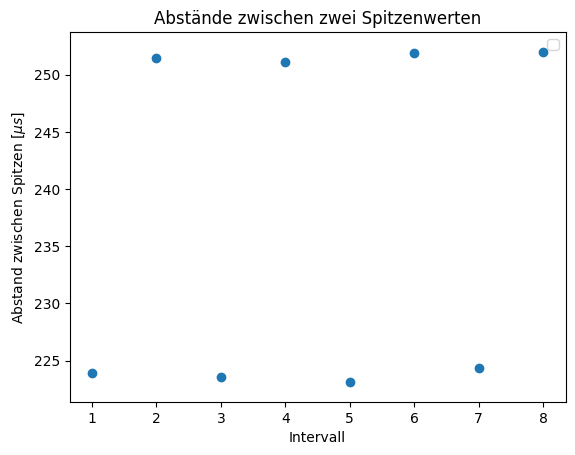

237.67073653846157 28.785103921568748 0.30249999999999133
[223.89205594405598, 251.4487474747475, 223.54752046783628, 251.15396842105264, 223.16692941176473, 251.86913725490197, 224.33549999999997, 251.95203333333347]
29.390000000000015
4207.50158208128


In [39]:
ps = [p1,p2,p3,p4,p5,p6,p7,p8,p9]
peakfinal = []
peakerror = []
for i in ps:
    peakfinal.append(np.mean(i))
    peakerror.append(np.max(i)-np.min(i))

#for i in range(len(peakfinal)):
#    print(np.round(peakfinal[i],2),"&",np.round(peakerror[i],2),"\\")

distance = []
distance_error = []
for k in range(0,len(peakfinal)-1):
    distance.append(peakfinal[k+1]-peakfinal[k])
    distance_error.append(peakerror[k+1]+peakerror[k])

for i in range(len(distance)):
    print(str(i+1),"&",np.round(distance[i],2),"&",np.round(distance_error[i],2),"\\")

#plt.scatter(range(1,len(distance)+1),distance,label="Werte")
plt.errorbar(range(1,len(distance)+1),distance,yerr=distance_error,fmt="o")
plt.xlabel(r"Intervall")
plt.ylabel(r"Abstand zwischen Spitzen [$\mu s$]")
plt.title("Abstände zwischen zwei Spitzenwerten")
plt.legend(loc=0)
plt.savefig("Plots/distances.pdf")
plt.show()

print(np.mean(distance),np.max(distance)-np.min(distance),np.mean(distance_error))
print(distance)
#print(peakfinal,peakerror)

print((251.95+0.31) - (223.17-0.3))

print((1/(np.mean(distance)*10**(-6))))

In [40]:
P = 2.79*10**(-3)
R = 1/(np.mean(distance)*10**(-6))
T = np.mean(distance)

uP = 0.3*10**(-3)
uR = 1/((251.95+0.31) - (223.17-0.3))
uT = (251.95+0.31) - (223.17-0.3)

print((-R)/(T*R**2))

print(((2.79*10**(-3))/(4207.5*95.14*10**(-9))))
print(np.sqrt((uP*1/(R*T))**2+(uR*(-R)/(T*R**2))**2+(uR*(-R)/(T**2*R*2))**2))

-1e-06
6.969745682973248
3.0309109983034366e-07


In [41]:
def gaussian(x: np.ndarray,a:float, mu: float, sigma: float,y0:float):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))+y0

Reduziert chi: 1.861084298159666e-06 chiquadrat 0.004273049548574593
{'a': 0.05810645602975121, 'mu': 0.059193679977103716, 'sigma': 0.04756566184355842, 'y0': 0.003841190924133724} [8.67252581e-05 7.69214038e-05 9.12429720e-05 4.23951816e-05]


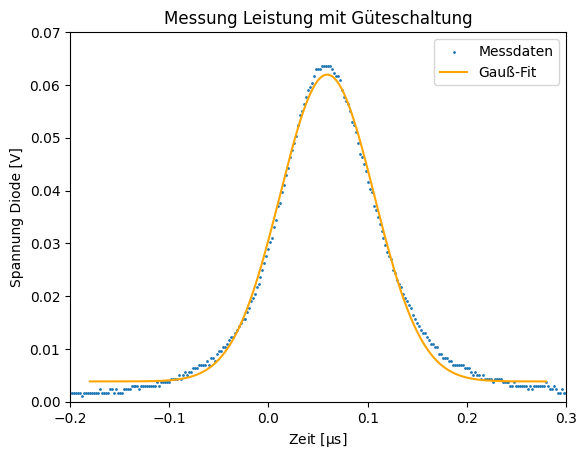

In [42]:
#plt.figure(figsize=(10,6))
#poptgauss1,covgauss1 = soc.curve_fit(gaussian,puls2[:,0]*10**6,puls2[:,1],method="lm")
#plt.plot(puls2[:,0]*10**6,gaussian(puls2[:,0]*10**6,*poptgauss1),label="Fit")
#stats.chisquare(puls2[:,0]*10**6,gaussian(puls2[:,0]*10**6,*poptgauss1),ddof=1)

plt.scatter(puls2[::10,0]*10**6,puls2[::10,1],label="Messdaten",s=1)

corner1 = 1600
corner2 = 3900

gmodel = Model(gaussian)

# create parameters with initial guesses:
params = gmodel.make_params(a=0.05, mu=0.06, sigma=0.08,y0=0.01)  
result = gmodel.fit(puls2[corner1:corner2,1], params,x=puls2[corner1:corner2,0]*10**6)


plt.plot(puls2[corner1:corner2,0]*10**6, result.best_fit, '-', label='Gauß-Fit',c="orange")
print("Reduziert chi:",result.redchi,"chiquadrat",result.chisqr)
print(result.best_values,np.sqrt(np.diag(result.covar)))

plt.axis([-2e-1,3e-1,0,0.07])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$")
plt.ylabel("Spannung Diode [V]")
plt.title("Messung Leistung mit Güteschaltung")
plt.legend(loc=1)
plt.savefig("Plots/osci2_fit.pdf")
plt.show()

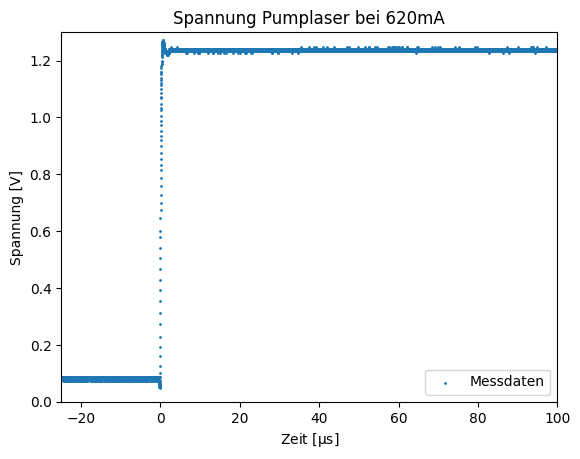

In [43]:
#plt.figure(figsize=(10,6))
plt.scatter(sg1c1[::40,0]*10**6,sg1c1[::40,1],label="Messdaten",s=1)
plt.axis([-25,100,0,1.3])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$")
plt.ylabel("Spannung [V]")
plt.title("Spannung Pumplaser bei 620mA")
plt.legend(loc=0)
plt.savefig("Plots/s1c1.pdf")
plt.show()

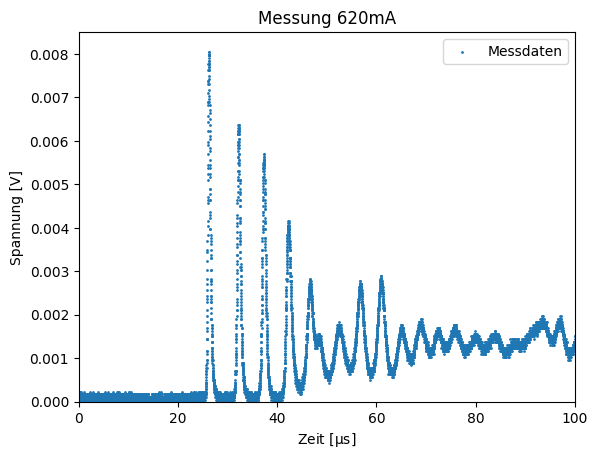

In [44]:
#plt.figure(figsize=(10,6))
plt.scatter(sg1c3[::40,0]*10**6,sg1c3[::40,1],label="Messdaten",s=1)
plt.axis([0,100,0,0.0085])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$")
plt.ylabel("Spannung [V]")
plt.title("Messung 620mA")
plt.legend(loc=1)
plt.savefig("Plots/s1c3.pdf")
plt.show()

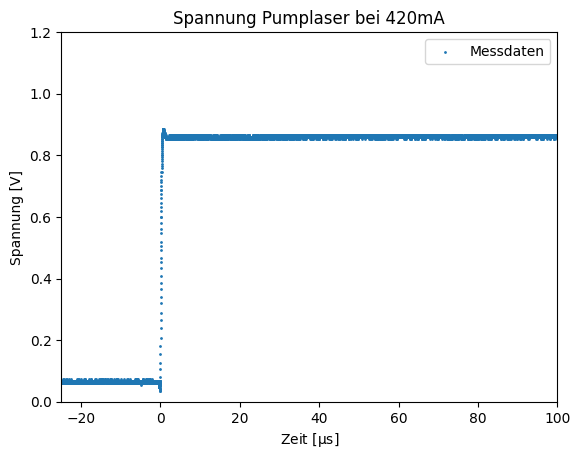

In [45]:
#plt.figure(figsize=(10,6))
plt.scatter(sg2c1[::40,0]*10**6,sg2c1[::40,1],label="Messdaten",s=1)
plt.axis([-25,100,0,1.2])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$")
plt.ylabel("Spannung [V]")
plt.title("Spannung Pumplaser bei 420mA")
plt.legend(loc=1)
plt.savefig("Plots/s2c1.pdf")
plt.show()

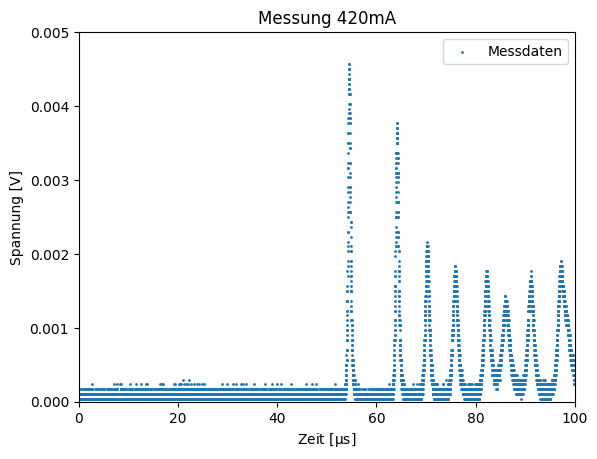

In [46]:
#plt.figure(figsize=(10,6))
plt.scatter(sg2c3[::40,0]*10**6,sg2c3[::40,1],label="Messdaten",s=1)
plt.axis([0,100,0,0.005])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$")
plt.ylabel("Spannung [V]")
plt.title("Messung 420mA")
plt.legend(loc=1)
plt.savefig("Plots/s2c3.pdf")
plt.show()

{'m': 0.25607124390660463, 'b': -11.783056098453937}
[0.00920322 2.97898963]


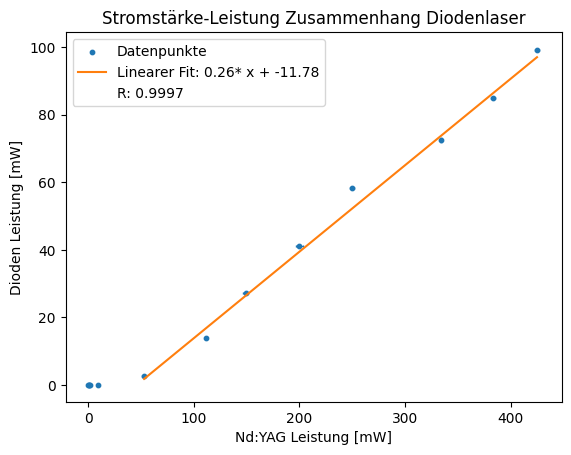

In [53]:
plt.errorbar(lpow2[:,1],ndpower[:,1],linestyle="",capsize=1,elinewidth=0.8,
            xerr = lpow2[:,2], yerr =ndpower[:,2], )
plt.scatter(lpow2[:,1],ndpower[:,1],
            s=10,label="Datenpunkte")

lparam1 = lmodel.make_params(m = 0.25,b = -11)
lresult4 = lmodel.fit(ndpower[5:13,1],params=lparam1, x = lpow2[5:13,1],weights = ndpower[5:13,2])


plt.plot(lpow2[5:13,1],lresult4.best_fit,label='Linearer Fit: '+str(np.round(lresult4.best_values["m"],2))+"* x + "+str(np.round(lresult4.best_values["b"],2)))
plt.plot([], [], ' ', label="R: "+str(np.round(lresult4.rsquared,4)))
plt.xlabel("Nd:YAG Leistung [mW]")
plt.ylabel("Dioden Leistung [mW]")
plt.title("Stromstärke-Leistung Zusammenhang Diodenlaser")
plt.legend()
plt.savefig("Plots/powerup.pdf")
print(lresult4.best_values)
print(np.sqrt(np.diag(lresult4.covar)))